In [1]:
# !python -m pip install mlagents==0.28.0
# !python -m pip install gym
# !cd "/Users/aditya/Documents/GitHub/game_creation_research/ml-agents/gym-unity" && pip3 install -e .

import random
import joblib
from PlaceAndShootGym import *
from GAME_1_SOLVER import *
from GAME_2_SOLVER import *
from GAME_3_SOLVER import *
from GAME_4_SOLVER import *
from GAME_5_SOLVER import *
from GAME_NULL_SOLVER import *

[0, 0, 0.436, 0.048, 'crate', False]
[0, 0, -0.418, -0.259, 'corner', False]
[0, 0, -0.938, 0.893, 'corner', False]
[0, 0, -0.307, -0.969, 'triangle', False]
[0, 0, 0.583, -0.123, 'gear', False]
[0, 0, 0, 0, None, True]
x_range =  0.17 0.37
y_range =  -0.22 -0.01999999999999999
required_percent_of_shots_in_chosen_zone =  0.0


In [2]:
GAME_1_ENV_PATH = "/Users/aditya/Documents/GitHub/game_creation_research/Object Physics Sandbox/Code/results/GAME_1_SOLVED.joblib"
GAME_2_ENV_PATH = "/Users/aditya/Documents/GitHub/game_creation_research/Object Physics Sandbox/Code/results/GAME_2_SOLVED.joblib"
# GAME_3_ENV_PATH = "/Users/aditya/Documents/GitHub/game_creation_research/Object Physics Sandbox/Code/results/GAME_3_SOLVED.joblib"
# GAME_4_ENV_PATH = "/Users/aditya/Documents/GitHub/game_creation_research/Object Physics Sandbox/Code/results/GAME_4_SOLVED.joblib"
GAME_5_ENV_PATH = "/Users/aditya/Documents/GitHub/game_creation_research/Object Physics Sandbox/Code/results/GAME_5_SOLVED.joblib"
# GAME_NULL_ENV_PATH = "/Users/aditya/Documents/GitHub/game_creation_research/Object Physics Sandbox/Code/results/GAME_NULL_SOLVED.joblib"

GAME_1_ENV = joblib.load(GAME_1_ENV_PATH)
GAME_2_ENV = joblib.load(GAME_2_ENV_PATH)
# GAME_3_ENV = joblib.load(GAME_3_ENV_PATH)
# GAME_4_ENV = joblib.load(GAME_4_ENV_PATH)
GAME_5_ENV = joblib.load(GAME_5_ENV_PATH)
# GAME_NULL_ENV = joblib.load(GAME_NULL_ENV_PATH)

In [3]:
# settings_from_actual_run = {"setup": [[0, 0, -0.249, 0.522, 'gear', False],
#                                       [0, 0, 0.246, 0.799, 'gear', False],
#                                       [0, 0, -0.563, -0.091, 'corner', False],
#                                       [0, 0, 0, 0, None, True]],
#                             "x_range":  (-0.5, -0.3),
#                             "y_range":  (0.12, 0.32),
#                             "required_percent_of_shots_in_chosen_zone":  0.23}


In [4]:
# GAME_NULL_REWARD.__setattr__("x_limit", settings_from_actual_run["x_range"][0])
# GAME_NULL_REWARD.__setattr__("y_limit", settings_from_actual_run["y_range"][0])
# GAME_NULL_REWARD.__setattr__("setup_array", settings_from_actual_run["setup"])

In [5]:
print("Playability GAME 1: ", round(len(GAME_1_ENV.winning_shots)/GAME_1_ENV.num_tries, 4))
print("Playability GAME 2: ", round(len(GAME_2_ENV.winning_shots)/GAME_2_ENV.num_tries, 4))
# print("Playability GAME 3: ", round(len(GAME_3_ENV.winning_shots)/GAME_3_ENV.num_tries, 4))
# print("Playability GAME 4: ", round(len(GAME_4_ENV.winning_shots)/GAME_4_ENV.num_tries, 4))
print("Playability GAME 5: ", round(len(GAME_5_ENV.winning_shots)/GAME_5_ENV.num_tries, 4))
# print("Playability GAME NULL: ", round(len(GAME_NULL_ENV.winning_shots)/GAME_NULL_ENV.num_tries, 5))

Playability GAME 1:  0.1892
Playability GAME 2:  0.0425
Playability GAME 5:  0.0321


In [6]:
def replayWinningShots(winning_shots, quiet=False):
    for shot in winning_shots:
        # reset
        env.step([0, 0, 0, 0, 0, 1], quiet=True)
        # place
        place = Action(shot["place_action"])
        place.transformed = True
        env.step(place, quiet = quiet)
        # shoot
        shoot = Action(shot["shoot_action"])
        shoot.transformed = True
        env.step(shoot, quiet = quiet)
        print(f"Reward: {shot['reward']}")

In [15]:
try:
    env.close()
except:
    pass

SERVER_BUILD = "../Builds/MLAgent_View_21April22_server.app"
GYM_BUILD = "../Builds/Gym_View_12May22.app"

channel = EngineConfigurationChannel()
channel.set_configuration_parameters(time_scale=5, quality_level=0)
unity_env = UnityEnvironment(
    file_name=GYM_BUILD, seed=1, side_channels=[channel], worker_id=2)

# unity_env = UnityEnvironment()

unity_env.reset()
gym_env = UnityToGymWrapper(unity_env, allow_multiple_obs=False)
env = GAME_2_ENV
env.gym_env = gym_env


E0512 08:42:30.175661000 4497161728 fork_posix.cc:76]                  Other threads are currently calling into gRPC, skipping fork() handlers


[INFO] Connected to Unity environment with package version 2.2.1-exp.1 and communication version 1.5.0
[INFO] Connected new brain: PlaceAndShoot?team=0
[WARNING] The environment contains multiple observations. You must define allow_multiple_obs=True to receive them all. Otherwise, only the first visual observation (or vector observation ifthere are no visual observations) will be provided in the observation.


In [16]:
env.setup(GAME_2_ENV.setup_array)

array([-3.825    , -4.0499997,  6.75     , -3.5      ,  0.       ,
        3.6000001,  6.75     , -0.65     ,  6.75     , -2.       ,
        0.       , -3.9      ,  0.       , -0.       , -1.       ,
        1.       ], dtype=float32)

In [13]:
GAME_1_ENV.winning_shots[0]

{'place_action': (0, 0, 0, 0, 0, 0),
 'shoot_action': (-0.5999999999999996, -1.0, 0, 0, 0, 0),
 'reward': 1.0}

In [17]:
shots_to_play = random.sample(GAME_2_ENV.winning_shots, 50)
# shots_to_play = GAME_2_ENV.winning_shots
replayWinningShots(shots_to_play, quiet = False)

Reward: 1.0
Reward: 1.0
Reward: 1.0
Reward: 1.0
Reward: 1.0
Reward: 1.0
Reward: 1.0
Reward: 1.0
Reward: 1.0
Reward: 1.0
Reward: 1.0
Reward: 1.0
Reward: 1.0
Reward: 1.0
Reward: 1.0
Reward: 1.0


KeyboardInterrupt: 

In [ ]:
rewards = [shot["reward"] for shot in GAME_NULL_ENV.winning_shots]

(array([44., 18., 17., 17., 10.,  7.,  3.,  1.,  4.,  8.]),
 array([0.00497512, 0.01447761, 0.0239801 , 0.03348259, 0.04298507,
        0.05248756, 0.06199005, 0.07149254, 0.08099502, 0.09049751,
        0.1       ]),
 <BarContainer object of 10 artists>)

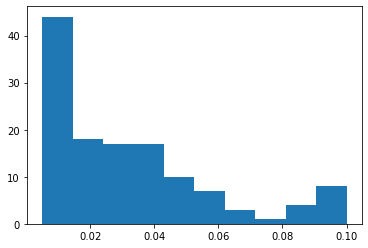

In [ ]:
import matplotlib.pyplot as plt
plt.hist(rewards)

In [ ]:
env.close()

In [ ]:
# env.reset()
